# Setup Monk

 - Run these commands
     
     - git clone -b THEFASHIONGEEK-patch-1 https://github.com/THEFASHIONGEEK/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/4_efficientdet/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda.txt | xargs -n 1 -L 1 pip install

In [0]:
!git clone -b THEFASHIONGEEK-patch-1 https://github.com/THEFASHIONGEEK/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 2368 (delta 90), reused 17 (delta 0), pack-reused 2191
Receiving objects: 100% (2368/2368), 83.66 MiB | 42.58 MiB/s, done.
Resolving deltas: 100% (372/372), done.
Checking out files: 100% (3755/3755), done.


In [0]:
cd Monk_Object_Detection/4_efficientdet/installation

/content/Monk_Object_Detection/4_efficientdet/installation


In [0]:
cat requirements.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 2.0MB 3.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2
     |████████████████████████████████| 773.1MB 23kB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
     |████████████████████████████████| 734.6MB 23kB/s 
  Found existing installation: torch 1.3.0
    Uninstalling torch-1.3.0:
      Successfully uninstalled torch-1.3.0
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.1-cp36-none-any.whl size=12407 sha256=854fde0fd876d42105a4d5a4e50325978df3adee532c718161512826620de6f3
  Stored in directory: /root/.cache/pip/wheels/0f/b0/79/1663bc9714b5d88deba05e

# Download Dataset

In [0]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_" -O PRImA Layout Analysis Dataset.zip && rm -rf /tmp/cookies.txt

--2020-01-26 11:10:41--  https://docs.google.com/uc?export=download&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_
Resolving docs.google.com (docs.google.com)... 64.233.181.102, 64.233.181.113, 64.233.181.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.181.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.19K  --.-KB/s    in 0s      

2020-01-26 11:10:41 (53.1 MB/s) - written to stdout [3268]

--2020-01-26 11:10:41--  https://docs.google.com/uc?export=download&confirm=Knyz&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_
Resolving docs.google.com (docs.google.com)... 74.125.124.101, 74.125.124.100, 74.125.124.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jj6kpgoqcv

In [0]:
!unzip -uq "/content/Monk_Object_Detection/4_efficientdet/installation/PRImA" -d "/content/Monk_Object_Detection/4_efficientdet/installation"

# Prepare Dataset

In [0]:
!pip install tqdm -U

     |████████████████████████████████| 61kB 2.4MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


## VOC Format

## Dataset Directory Structure

    ../PRImA Layout Analysis Dataset/ (root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.tif
          |              |------------------img2.tif
          |              |------------------.........(and so on)
          |
          |
          |-----------Annotations (anno_dir)
          |              |
          |              |------------------img1.xml
          |              |------------------img2.xml
          |              |------------------.........(and so on)

## Monk Format

## Dataset Directory Structure

    ../PRImA Layout Analysis Dataset (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels  | image_width | image_height                               |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  | width | height
           
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

## COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------PRImA Layout Analysis Dataset (coco_dir) 
          |         |
          |         |---Images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_Images.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

## VOC to Monk type

In [0]:
import os
import sys
import numpy as np
import pandas as pd

import xmltodict
import json

from tqdm.notebook import tqdm

from pycocotools.coco import COCO

In [0]:
Images_jpg_folder ="PRImA Layout Analysis Dataset/Images_jpg/"

In [0]:
if not os.path.isdir(Images_jpg_folder):
    os.mkdir(Images_jpg_folder);

In [0]:
from PIL import Image
img_folder = "PRImA Layout Analysis Dataset/Images"
Image_list = os.listdir(img_folder)
for name in Image_list:
    im = Image.open(img_folder+'/'+name)
    name = str(name).rstrip(".tif")
    im.save(Images_jpg_folder+name + '.jpg', 'JPEG')

In [0]:
root_dir = "PRImA Layout Analysis Dataset/";
img_dir = "Images_jpg/";
anno_dir = "XML/";
anno_folder = "PRImA Layout Analysis Dataset/XML"
img_folder = "PRImA Layout Analysis Dataset/Images_jpg"

In [0]:
combined = []
all_filenames = os.listdir(anno_folder)
for filename in all_filenames:
    annoFile = "{}/{}".format(anno_folder, filename)
    f = open(annoFile, 'r')
    my_xml = f.read()
    if len(filename) == 12:
      image_name = filename[0:8]+'.jpg'
    if len(filename) == 15:
      image_name = filename.split("-")[1]
      image_name = image_name[0:8]+'.jpg'
    label_str = ""
    object = ['SeparatorRegion','NoiseRegion','TextRegion','ImageRegion']
    for i in object:
        try:
            image_width= dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])['@imageWidth']
            image_height = dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])['@imageHeight']
            p = dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])[i]  
            try:
                a = dict(dict(dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])[i])['Coords'])['Point']
                x = []
                y = []
                for j in range(len(a)):
                    x.append(int(dict(a[j])['@x']))
                    y.append(int(dict(a[j])['@y']))
                x1 = str(min(x))
                y1 = str(min(y))
                x2 = str(max(x))
                y2 = str(max(y))
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + i + " "

            except:

                b = dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])[i]
                for k in range(len(b)):
                    c = b[k]
                    d = dict(dict(c)['Coords'])['Point']
                    x = []
                    y = []
                    for l in range(len(a)):
                        x.append(int(dict(a[l])['@x']))
                        y.append(int(dict(a[l])['@y']))
                    x1 = str(min(x))
                    y1 = str(min(y))
                    x2 = str(max(x))
                    y2 = str(max(y))
                    label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + i + " "
        except:
            continue
    label_str = label_str.strip()
    combined.append([image_name, label_str,image_width,image_height]) 

In [0]:
df = pd.DataFrame(combined, columns = ['ID', 'Label','image_width','image_height'])
df['Label'] = df['Label'].replace('',np.NaN)
df = df[pd.notnull(df['Label'])]
df = df.reset_index(drop=True)
df.to_csv(root_dir+"/train_labels.csv", index=False)

In [0]:
columns = df.columns

In [0]:
import os
Image_list = os.listdir(img_folder)
a = df[columns[0]].tolist()
b = [x for x in Image_list if x not in a]
for file in b:
  os.remove(img_folder + '/' + file)

## Monk Type to COCO

In [0]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [0]:
root = "PRImA Layout Analysis Dataset/";
img_dir = "Images_jpg/";
anno_file = "train_labels.csv";

In [0]:
dataset_path = root;
images_folder = root + img_dir;
annotations_path = root + "annotations/";

In [0]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + anno_file;

In [0]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [0]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [0]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [0]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 4/4 [00:00<00:00, 7513.31it/s]


In [0]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    image_in_path = input_images_folder  + img_name;
    #print(image_in_path)


    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = int(df[columns[3]][i]);
    images_tmp["width"] = int(df[columns[2]][i]);
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];

        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);

        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

100%|██████████| 474/474 [00:00<00:00, 4736.92it/s]


# Training

In [0]:
import os
import sys
sys.path.append("../../4_efficientdet/lib/");

In [0]:
from train_detector import Detector

../../4_efficientdet/lib/train_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [0]:
gtf = Detector();

In [0]:
root_dir = "./";
coco_dir = "PRImA Layout Analysis Dataset";
img_dir = "./";
set_dir = "Images_jpg";

In [0]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, use_gpu=True)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [0]:
gtf.Model();

Downloading: "https://publicmodels.blob.core.windows.net/container/aa/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:01<00:00, 15.5MB/s]


Loaded pretrained weights for efficientnet-b0


In [0]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1)

## Loss Plots

In [0]:
logs_base_dir = "tensorboard/signatrix_efficientdet_coco"
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard
%tensorboard --logdir {logs_base_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 661), started 0:00:04 ago. (Use '!kill 661' to kill it.)

In [0]:
gtf.Train(num_epochs=5, model_output_dir="trained/");

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type EfficientDet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/p

# Inference

In [0]:
import os
import sys
sys.path.append("../../4_efficientdet/lib/");

In [0]:
from infer_detector import Infer

In [0]:
gtf = Infer();

In [0]:
gtf.Model(model_dir="trained/")

In [0]:
class_list = ['ImageRegion','NoiseRegion','TextRegion','SeparatorRegion']

In [0]:
img_folder = "/content/Monk_Object_Detection/4_efficientdet/installation/PRImA Layout Analysis Dataset/Images_jpg/00000087.jpg";
gtf.Predict(img_folder, class_list, vis_threshold=0.001);

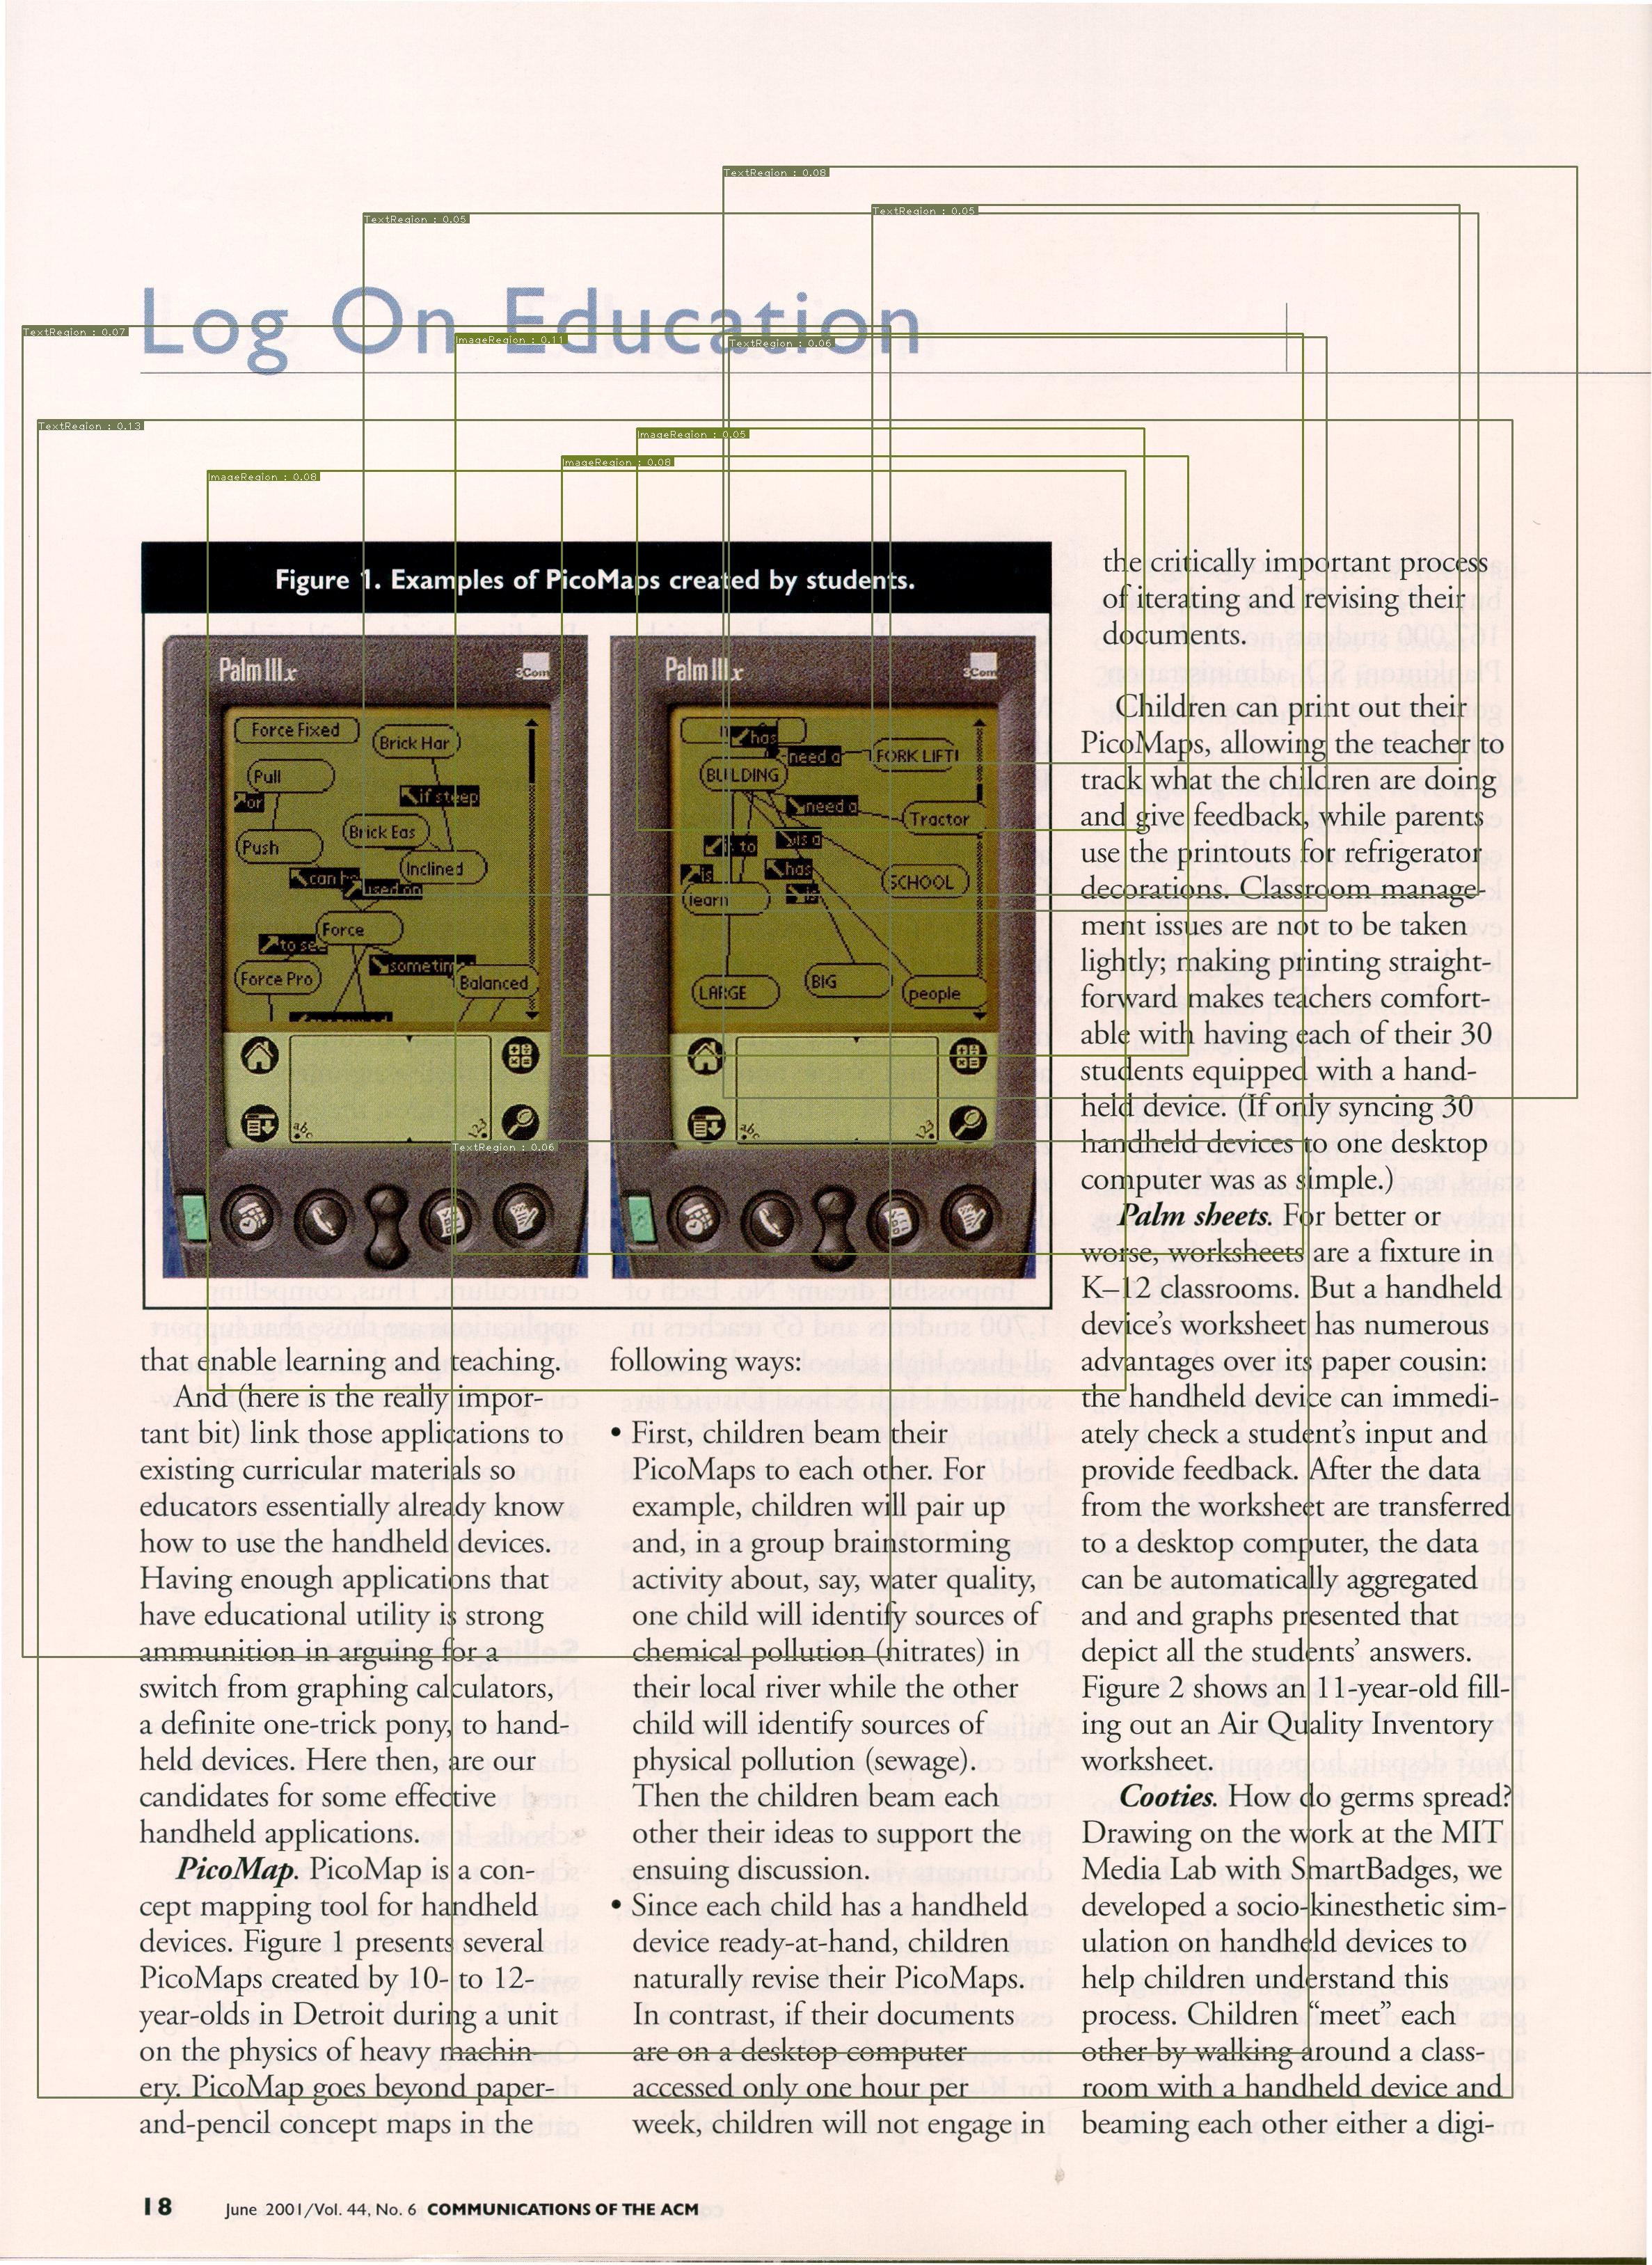

In [0]:
from IPython.display import Image
Image(filename='Inference/00000087.jpg')